In [1]:
what_were_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together",
}

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.5.1+cu124'

1. Data (preparing and loading)

In [ ]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
# Create train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
def plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c = 'b', s= 4, label = 'Training Data')
    plt.scatter(test_data, test_labels, c = 'g', s = 4, label = 'Testing Data')
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c = 'r', s=4, label = "Prediction")
    plt.legend(prop={'size': 14})
    plt.show()

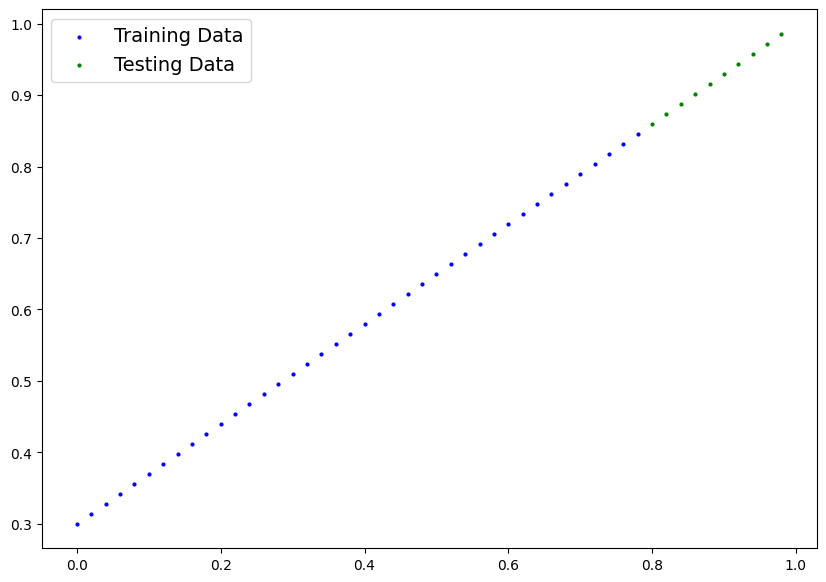

In [6]:
plot_predictions()

In [7]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.weights = nn.Parameter(
            torch.randn(1, dtype=torch.float), 
            requires_grad=True
        )
        
        self.bias = nn.Parameter(
            torch.randn(1, dtype=torch.float),
            requires_grad=True
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # x is the input data, which has to be of type torch.Tensor
        # the output is also of the type torch.Tensor
        # y = m*x + b
        return self.weights * x + self.bias

In [8]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
with torch.inference_mode():
    y_preds = model_0(X_test)

In [ ]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


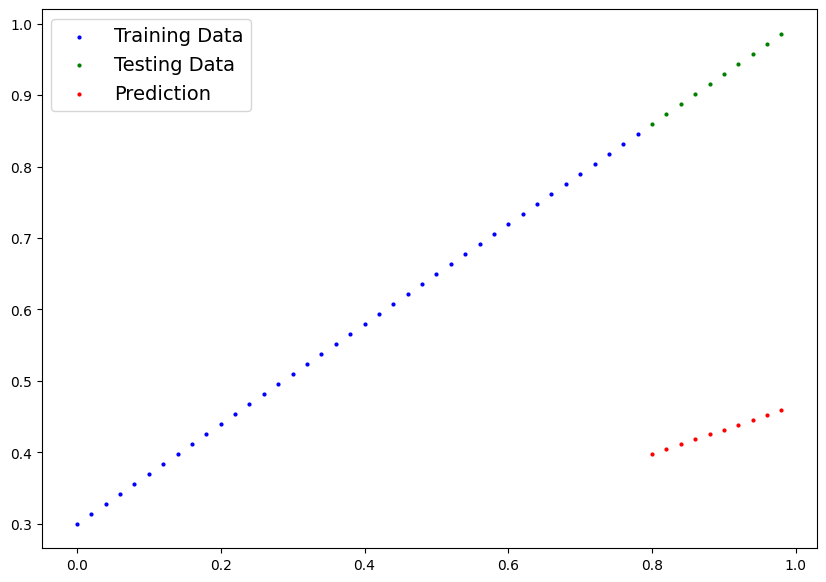

In [12]:
plot_predictions(predictions=y_preds)

In [13]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

In [14]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params= model_0.parameters(), lr=0.01)

In [15]:
torch.manual_seed(42)

epochs = 100

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training
    
    # put model in training model
    model_0.train()
    
    # forward pass on train data
    y_pred = model_0(X_train)
    
    # Calculate loss
    loss = loss_fn(y_pred, y_train)
    
    # zero grad of optimizer
    optimizer.zero_grad()
    
    # loss backwards
    loss.backward()
    
    # progress the optimizer
    optimizer.step()
    
    ### Testing
    
    model_0.eval()
    
    with torch.inference_mode():
        # forward pass
        test_pred = model_0(X_test)
        
        test_loss = loss_fn(test_pred, y_test.type(torch.float))
        
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135 
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519 
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484 
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819 


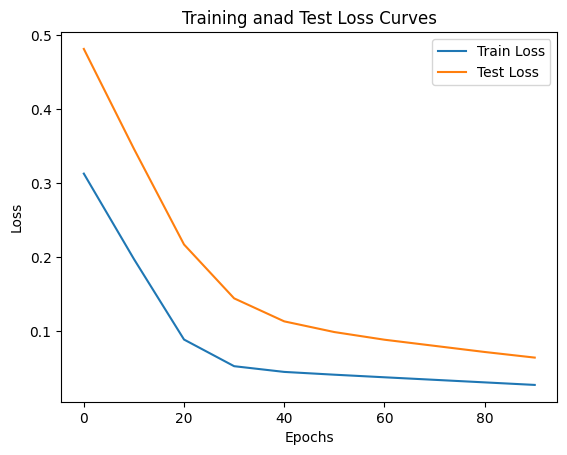

In [16]:
# Plot loss curves
plt.plot(epoch_count, train_loss_values, label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training anad Test Loss Curves")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

In [17]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict({'weights': tensor([0.5784]), 'bias': tensor([0.3513])})

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [18]:
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)
    
y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

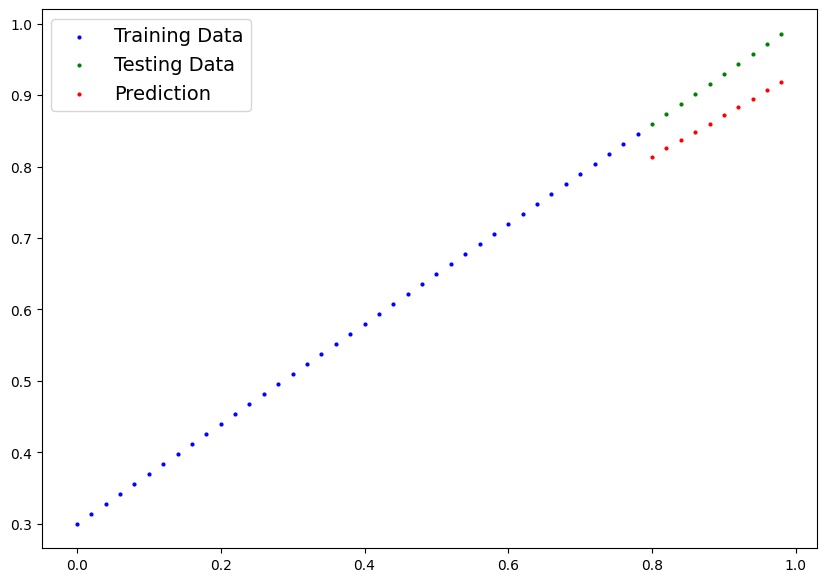

In [19]:
plot_predictions(predictions=y_preds)

In [20]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [21]:
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 oak oak 1680 Jan 26 12:37 models/01_pytorch_workflow_model_0.pth


In [22]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

/tmp/ipykernel_2828/933214503.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))


<All keys matched successfully>

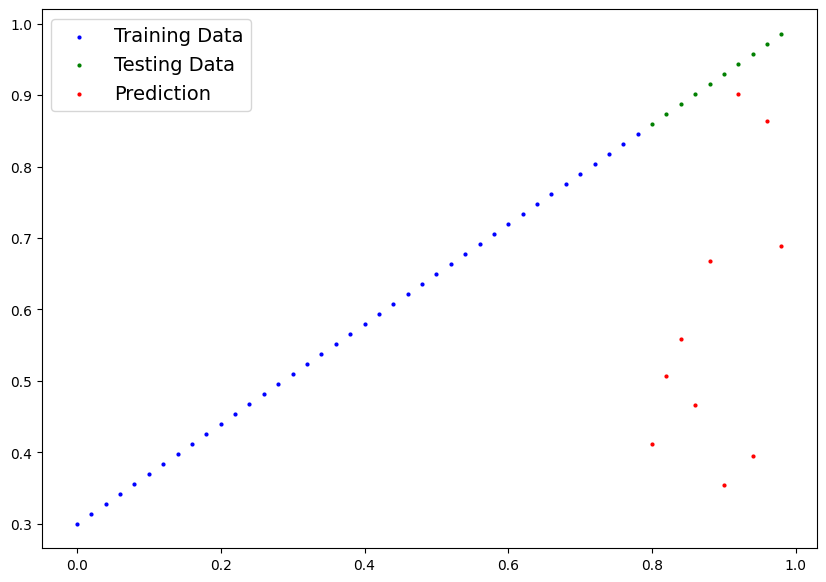

In [25]:
# Use X_test size to generate X_new
X_new = torch.rand_like(X_test)

# Detach the tensor and convert to NumPy
predictions = loaded_model_0.forward(X_new).detach().numpy()

# Call the plot function
plot_predictions(predictions=predictions)
